In [1]:
import pandas as pd

### Decision Tree Task

### 약물 A, B, C, X, Y
##### 다중 분류(Multiclass Classification)
- 의학 연구원으로서 동일한 질병을 앓고 있는 일련의 환자에 대한 데이터를 수집했다.
- 치료 과정 동안 각 환자는 5가지 약물, 즉 약물 A, 약물 B, 약물 c, 약물 x 및 y 중 하나에 반응했다.
-  미래에 동일한 질병을 앓는 환자에게 어떤 약물이 적합할 수 있는지 알아보기 위한 모델을 구축한다.

In [2]:
import pandas as pd
drug_df = pd.read_csv('./datasets/drugs.csv')
drug_df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
# 
drug_df['Sex'] = drug_df['Sex'].replace({'F': 0, 'M': 1})
drug_df['BP'] = drug_df['BP'].replace({'LOW': 0, 'NORMAL': 1, 'HIGH' : 2})
drug_df['Cholesterol'] = drug_df['Cholesterol'].replace({'LOW': 0, 'NORMAL': 1, 'HIGH' : 2})
drug_df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,2,25.355,drugY
1,47,1,0,2,13.093,drugC
2,47,1,0,2,10.114,drugC
3,28,0,1,2,7.798,drugX
4,61,0,0,2,18.043,drugY
...,...,...,...,...,...,...
195,56,0,0,2,11.567,drugC
196,16,1,0,2,12.006,drugC
197,52,1,1,2,9.894,drugX
198,23,1,1,1,14.020,drugX


In [4]:
drug_df.isna().sum() # 결측치 x 

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [5]:
na_to_k_df = drug_df.loc[:, 'Na_to_K'].reset_index()
na_to_k_df

,index,Na_to_K
0,0,25.355
1,1,13.093
2,2,10.114
3,3,7.798
4,4,18.043
...,...,...
195,195,11.567
196,196,12.006
197,197,9.894
198,198,14.020


In [6]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std_na_to_k = std.fit_transform(na_to_k_df[['Na_to_K']])
std_na_to_k

array([[ 1.28652212],
       [-0.4151454 ],
       [-0.82855818],
       [-1.14996267],
       [ 0.27179427],
       [-1.03769314],
       [ 0.02643885],
       [-0.70046821],
       [-0.12676951],
       [ 0.45567206],
       [-0.59916196],
       [ 0.43221897],
       [-0.09832049],
       [ 0.674105  ],
       [-0.46926791],
       [-0.0788919 ],
       [-0.64245998],
       [-0.29316156],
       [-1.21935052],
       [ 1.37242427],
       [ 0.42236589],
       [ 1.36451406],
       [ 2.00995979],
       [-0.14550423],
       [ 2.41490725],
       [ 0.37809645],
       [ 1.9819271 ],
       [-0.93028076],
       [ 0.91765633],
       [ 0.25902691],
       [-1.01784822],
       [-0.90446848],
       [-0.70366006],
       [ 2.19147839],
       [-0.27081868],
       [-1.2211546 ],
       [-0.92139911],
       [-0.29787994],
       [-0.88476233],
       [-0.97149714],
       [ 0.43527203],
       [-0.25610845],
       [-0.04086736],
       [-0.53074555],
       [-0.5258884 ],
       [-1

In [7]:
na_to_k_df['Na_to_K'] = std_na_to_k
na_to_k_df

,index,Na_to_K
0,0,1.286522
1,1,-0.415145
2,2,-0.828558
3,3,-1.149963
4,4,0.271794
...,...,...
195,195,-0.626917
196,196,-0.565995
197,197,-0.859089
198,198,-0.286500


In [8]:
cond1 = na_to_k_df['Na_to_K'] >= -1.96
cond2 = na_to_k_df['Na_to_K'] <= 1.96
cond = cond1&cond2

drug_df = drug_df.iloc[na_to_k_df[cond].index].reset_index(drop=True)
drug_df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,2,25.355,drugY
1,47,1,0,2,13.093,drugC
2,47,1,0,2,10.114,drugC
3,28,0,1,2,7.798,drugX
4,61,0,0,2,18.043,drugY
...,...,...,...,...,...,...
183,56,0,0,2,11.567,drugC
184,16,1,0,2,12.006,drugC
185,52,1,1,2,9.894,drugX
186,23,1,1,1,14.020,drugX


In [9]:
drug_enc_df = drug_df.copy()

In [10]:
from sklearn.preprocessing import LabelEncoder

drug_encoder = LabelEncoder()

# 파이썬 리스트로 전달해야 한다.
targets = drug_encoder.fit_transform(drug_df['Drug'].tolist())
drug_enc_df['Drug'] = targets

gender_encoder = LabelEncoder()
genders = gender_encoder.fit_transform(drug_df['Sex'].tolist())
drug_enc_df['Sex'] = genders

blood_pressure_encoder = LabelEncoder()
blood_pressures = blood_pressure_encoder.fit_transform(drug_df['BP'].tolist())
drug_enc_df['BP'] = blood_pressures

choleserol_encoder = LabelEncoder()
choleserols = choleserol_encoder.fit_transform(drug_df['Cholesterol'].tolist())
drug_enc_df['Cholesterol'] = choleserols

In [11]:
drug_encoder.classes_

array(['drugA', 'drugB', 'drugC', 'drugX', 'drugY'], dtype='<U5')

In [12]:
drug_encoder.inverse_transform(drug_enc_df['Drug'])

array(['drugY', 'drugC', 'drugC', 'drugX', 'drugY', 'drugX', 'drugY',
       'drugC', 'drugY', 'drugY', 'drugC', 'drugY', 'drugY', 'drugY',
       'drugX', 'drugY', 'drugX', 'drugA', 'drugC', 'drugY', 'drugY',
       'drugY', 'drugY', 'drugY', 'drugX', 'drugY', 'drugY', 'drugX',
       'drugB', 'drugX', 'drugX', 'drugX', 'drugA', 'drugX', 'drugX',
       'drugX', 'drugY', 'drugB', 'drugY', 'drugX', 'drugX', 'drugX',
       'drugA', 'drugC', 'drugY', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugB', 'drugC', 'drugB', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugA', 'drugY', 'drugX', 'drugB', 'drugY', 'drugA', 'drugX',
       'drugY', 'drugY', 'drugB', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugY', 'drugA', 'drugY', 'drugA', 'drugX', 'drugB', 'drugX',
       'drugC', 'drugA', 'drugC', 'drugB', 'drugX', 'drugY', 'drugY',
       'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugX',
       'drugY', 'drugY', 'drugA', 'drugA', 'drugC', 'drugX', 'drugY',
       'drugX', 'dru

In [13]:
drug_df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

dtc = DecisionTreeClassifier()

features, targets = drug_enc_df.iloc[:,:-1] , drug_enc_df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)

dtc.fit(X_train.values, y_train.values) 

DecisionTreeClassifier()

In [15]:
from sklearn.tree import export_graphviz

export_graphviz(dtc, out_file='./images/drug_dtc01.dot', class_names=drug_encoder.classes_, feature_names=features.columns, 
                impurity=True, filled=True)

In [16]:
import graphviz

with open('./images/drug_dtc01.dot') as f:
    drug_dtc01 = f.read()

drug_dtc01_graph = graphviz.Source(drug_dtc01)
    

In [17]:
drug_dtc01_graph.render(filename="drug_dtc01", directory="./images", format="png")

'images\\drug_dtc01.png'

<img src="./images/drug_dtc01.png">

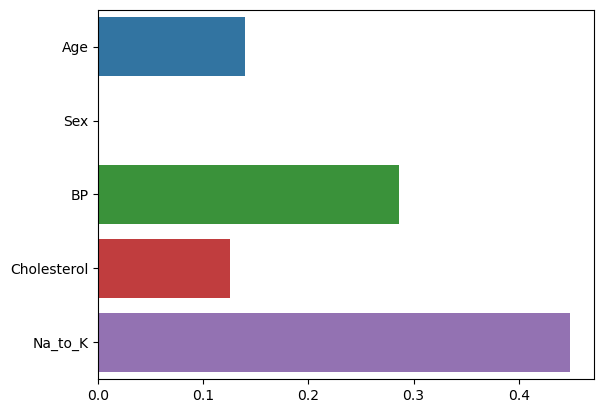

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=dtc.feature_importances_, y=features.columns)
plt.show()

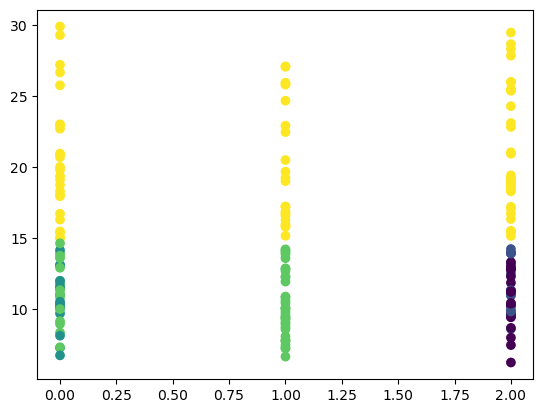

In [19]:
plt.scatter(features.iloc[:,2], features.iloc[:,-1], c=targets)

In [20]:
targets

0      4
1      2
2      2
3      3
4      4
      ..
183    2
184    2
185    3
186    3
187    3
Name: Drug, Length: 188, dtype: int64

In [21]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X.values, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow',
                           zorder=1)


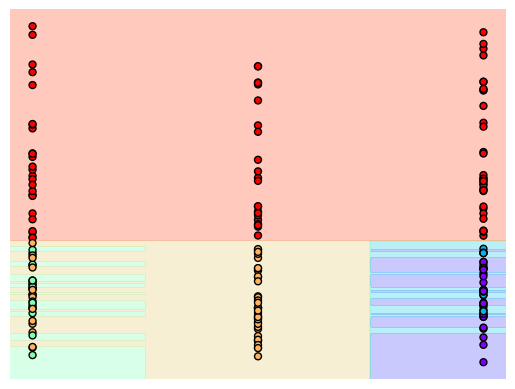

In [22]:
features_2_4 = features.iloc[:,[2,4]]
visualize_boundary(dtc, features_2_4, targets)

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

dtc = DecisionTreeClassifier()

features, targets = drug_enc_df.iloc[:,:-1] , drug_enc_df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)

dtc.fit(X_train.values, y_train.values) 

DecisionTreeClassifier()

In [24]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, dtc.predict(X_test.values))

0.9736842105263158